<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/04.04.2024/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib  import pyplot as plt
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"

df = pd.read_csv(url)

In [8]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
167,57,F,NORMAL,HIGH,14.216,drugX
194,46,F,HIGH,HIGH,34.686,drugY
51,67,M,NORMAL,NORMAL,10.898,drugX
145,61,M,NORMAL,HIGH,9.443,drugX
73,41,F,NORMAL,NORMAL,22.905,drugY
159,34,F,LOW,NORMAL,12.923,drugX
57,40,M,HIGH,HIGH,27.826,drugY
4,61,F,LOW,HIGH,18.043,drugY
84,47,F,LOW,HIGH,10.067,drugC
8,60,M,NORMAL,HIGH,15.171,drugY


Matnli ustunlarga ishlov beramiz

In [10]:
encoder  = LabelEncoder()
df['Sex'] = encoder.fit_transform(df["Sex"].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
194,46,0,0,0,34.686,drugY
110,50,1,0,0,7.490,drugA
90,62,1,2,0,16.594,drugY
55,26,0,1,0,14.160,drugC
182,20,0,1,1,11.686,drugX
100,31,1,0,1,11.871,drugA
75,26,1,1,1,20.909,drugY
82,32,0,1,0,9.712,drugC
34,53,1,2,0,14.133,drugX
33,65,0,0,1,31.876,drugY


In [11]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [12]:
y = df['Drug'].values

**Train/Test split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

**Model**

In [14]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Baholash**

In [15]:
y_predict = tree_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [19]:
print("DicisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DicisionTrees's Accuracy:  0.95


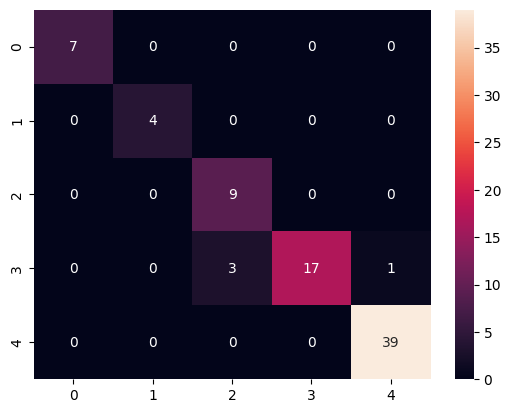

In [21]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [22]:
#Cross validation

In [24]:
predict = cross_val_predict(estimator = tree_model, X = X, y=y, cv=5)
print("Classification Report: /n", classification_report(y, predict))

Classification Report: /n               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



Decision tree chizish

In [25]:
cols = df.drop('Drug', axis=1).columns

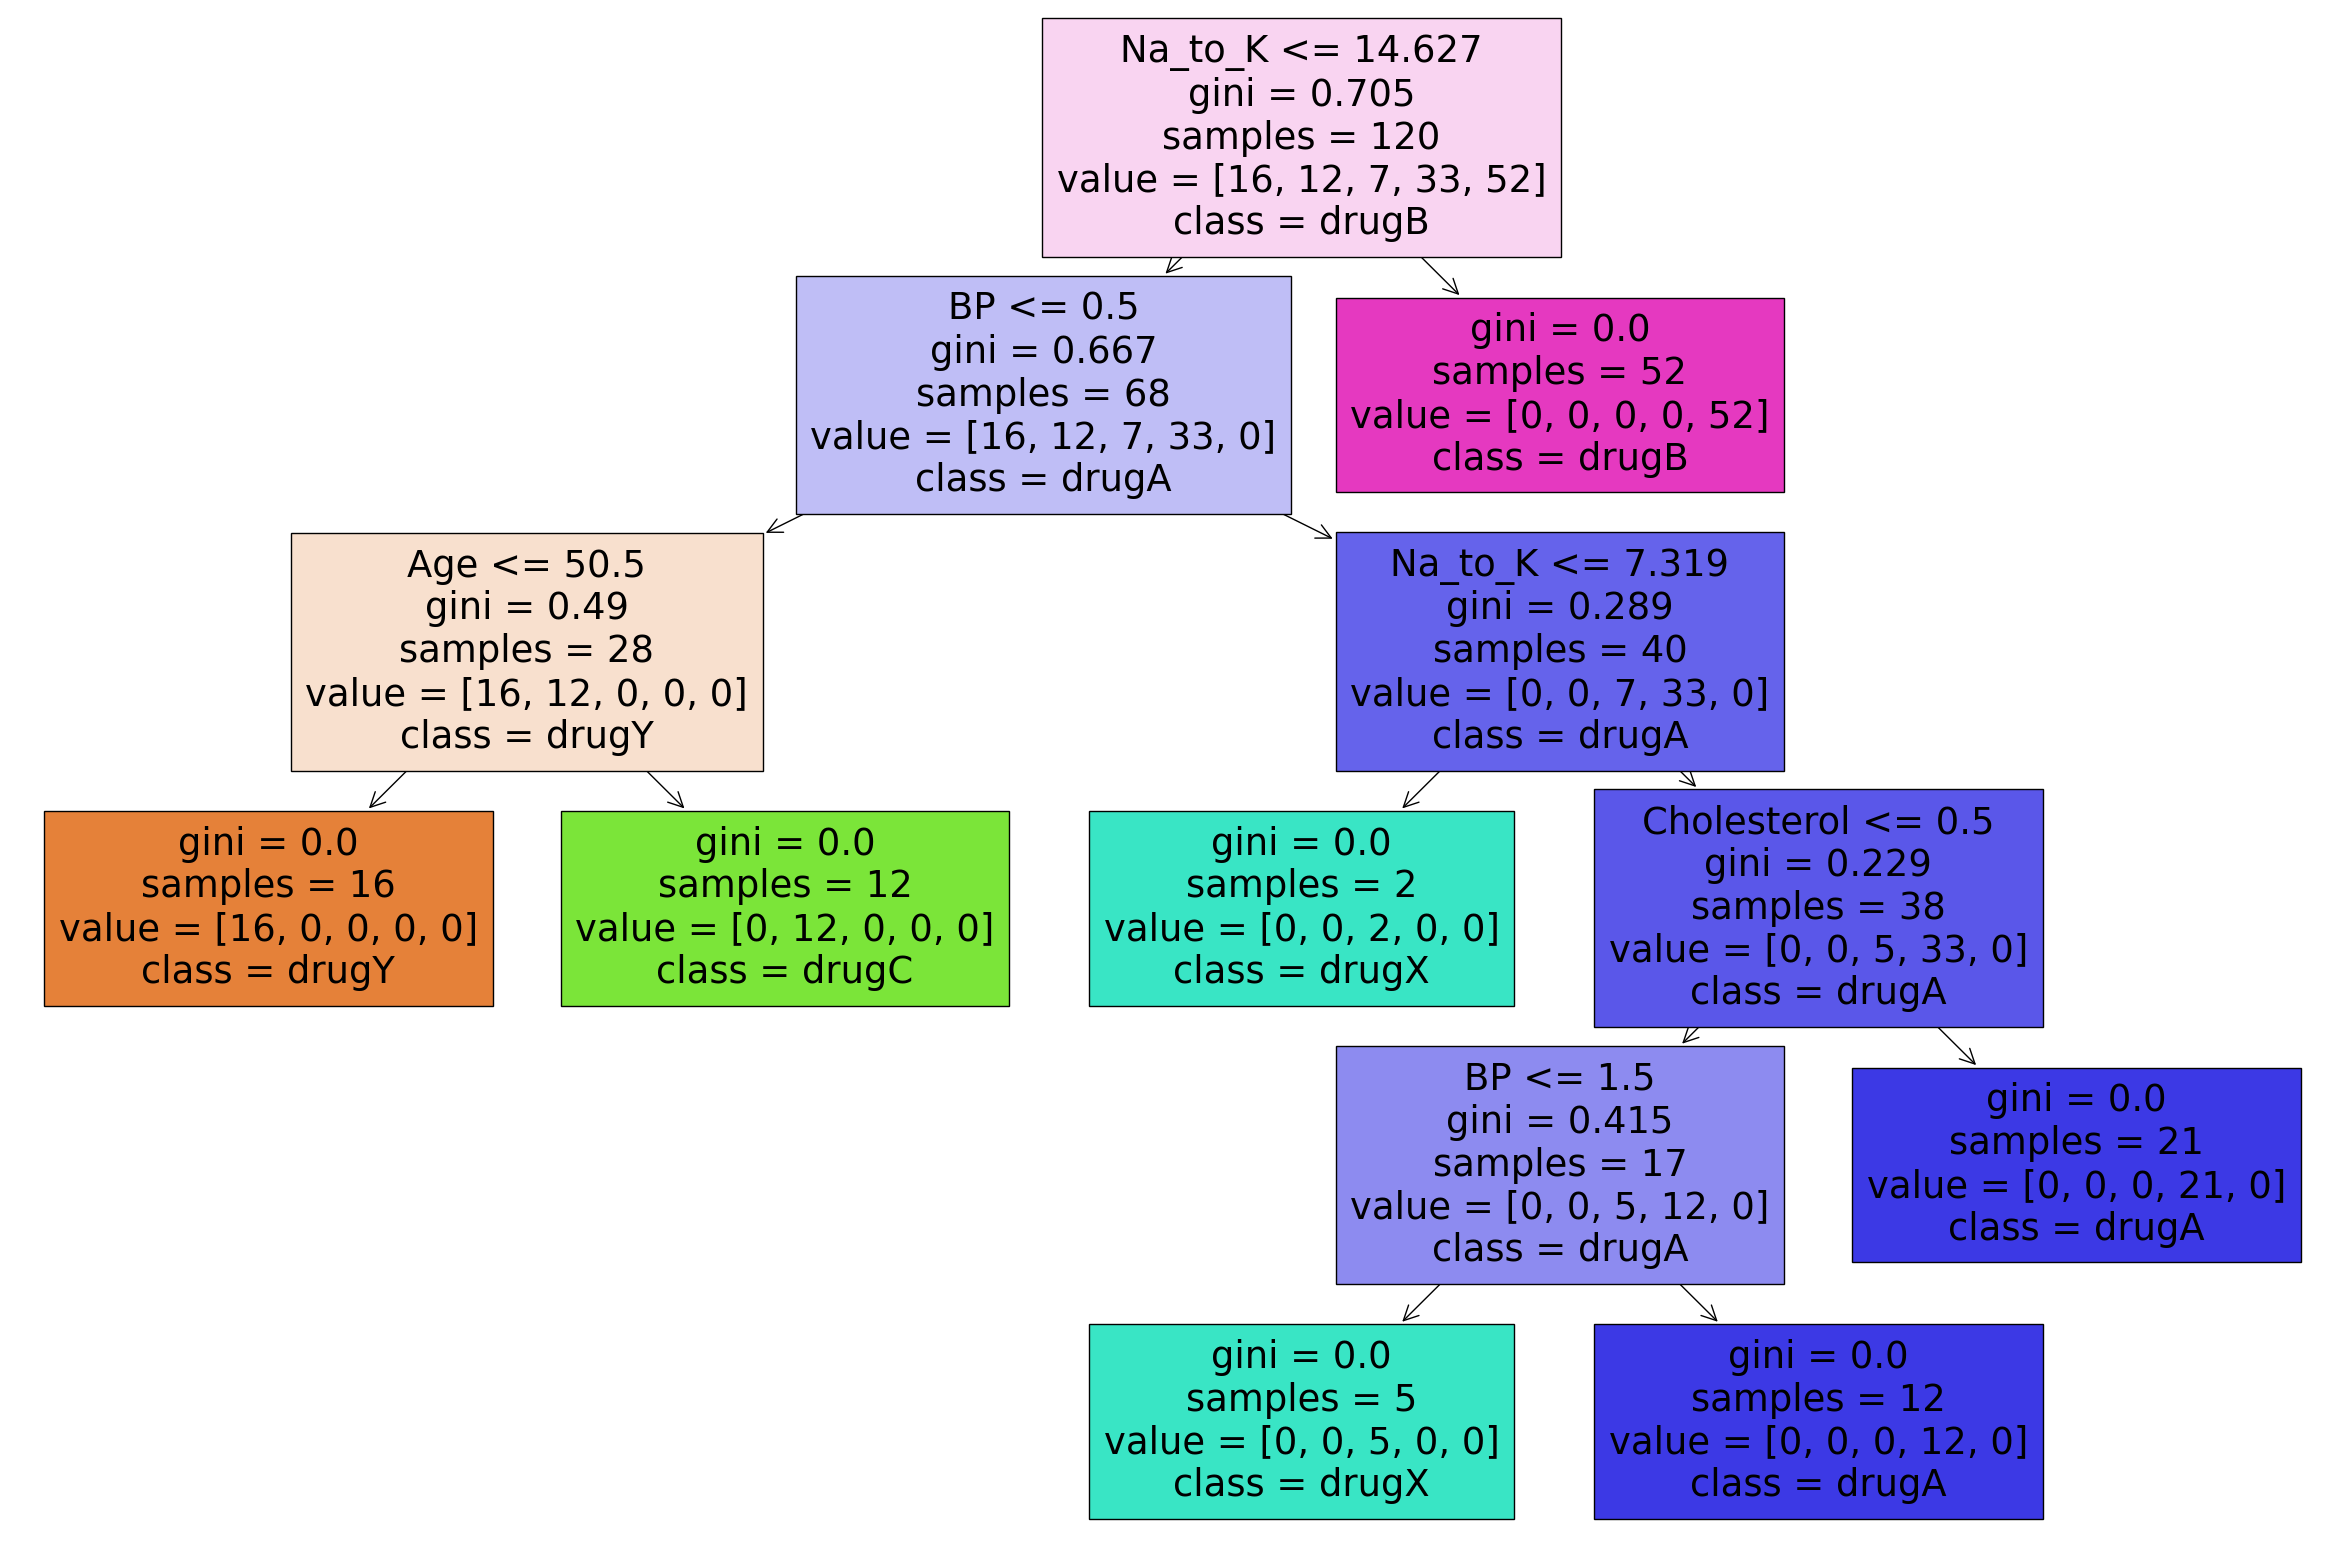

In [26]:
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# **Decision Tree. Hyperparameters**

DecisionTrees's Accuracy:  0.95


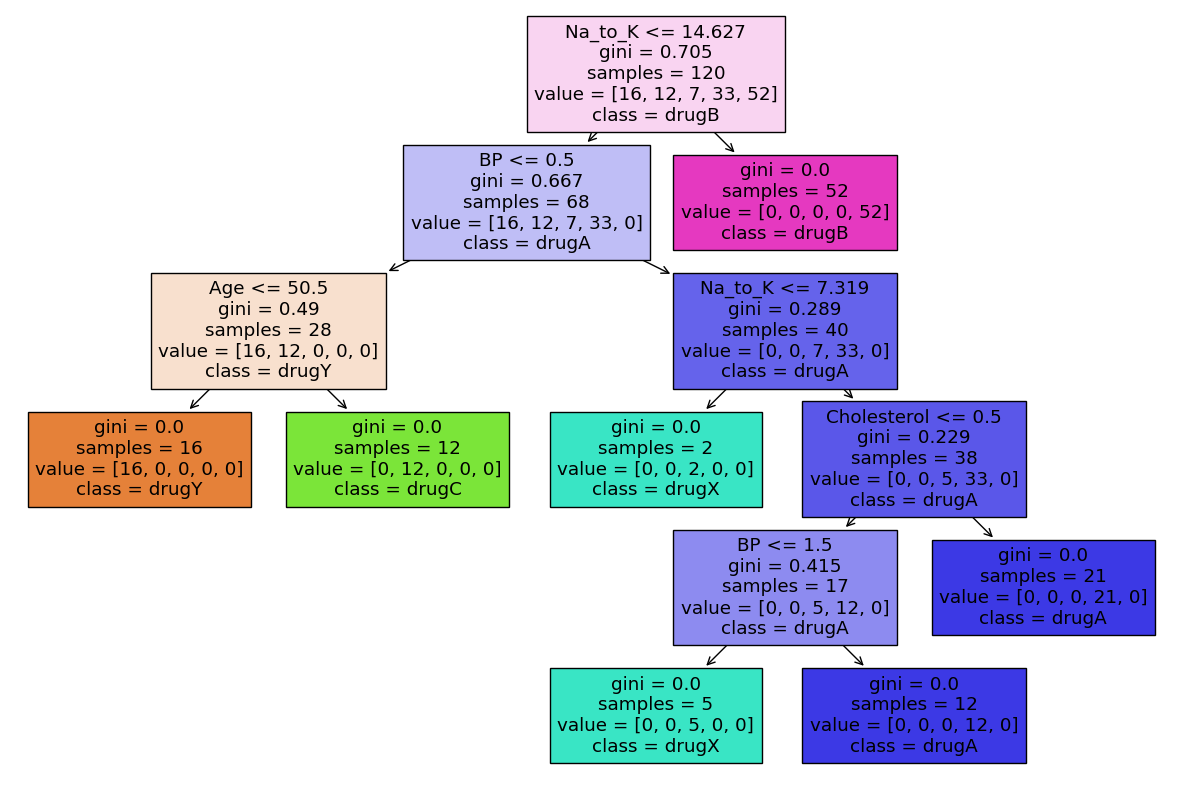

In [31]:
tree_model= DecisionTreeClassifier(min_impurity_decrease=0.0) # min_impurity_decrease , max_depth, min_samples_leaf
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(15,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [34]:
print("DEsitionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DEsitionTrees's Accuracy:  0.9875
